# Credit Card Transactions Fraud Detection

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Train multiple models and evaluate how effectively they predict credit card transactions fraud.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
file_url = "https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Machine_Learning_in_Python/Week3/Labs/data/fraud_data.csv.gz"
df = pd.read_csv(file_url)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


## Understand the dataset


Each row in the dataframe corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. The target is stored in the `Class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

## Analyze the `Amount` feature

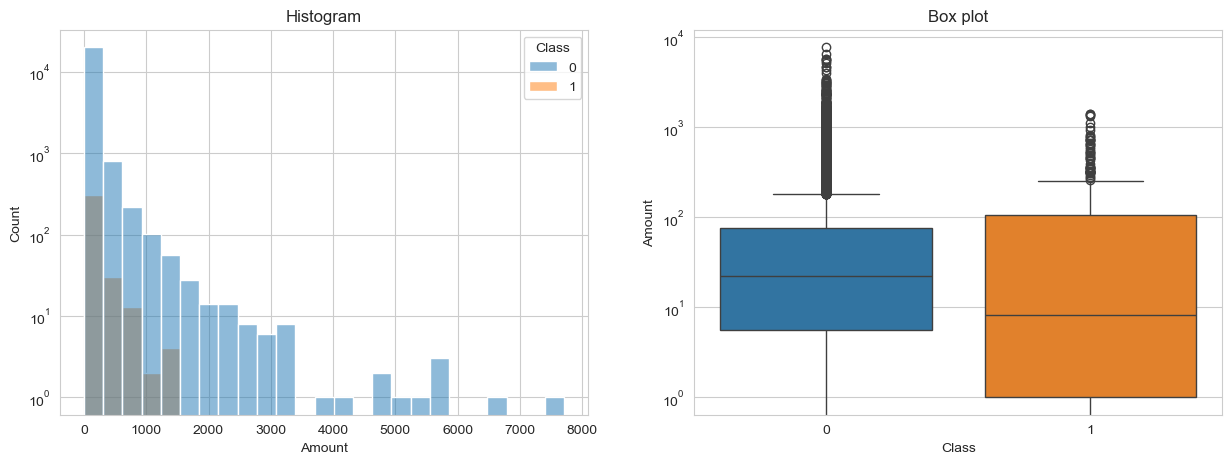

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x="Amount", hue="Class", bins="doane", ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title("Histogram")

sns.boxplot(data=df, x="Class", y="Amount", hue="Class", ax=axs[1], legend=False)
axs[1].set_yscale('log')
axs[1].set_title("Box plot")

plt.show()

## Visualize the class distribution

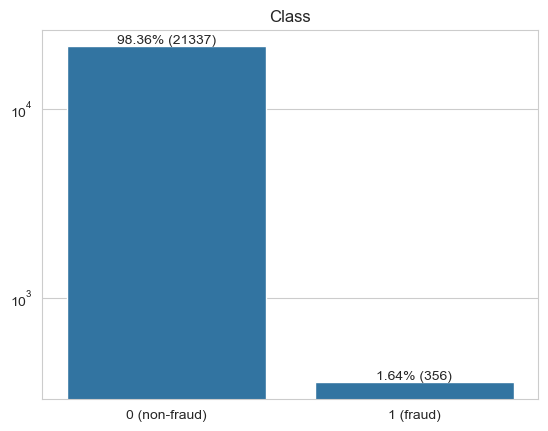

In [5]:
labels, sizes = np.unique(df["Class"], return_counts=True)
labels = ["1 (fraud)" if i else "0 (non-fraud)" for i in labels]

plt.figure()
g = sns.barplot(x=labels, y=sizes)
g.bar_label(g.containers[0], [str(round(100 * size / sum(sizes), 2)) + "%" + " (" + str(size) + ")" for size in sizes])
plt.yscale("log")
plt.title("Class")
plt.show()

## Split the dataset into train and test subsets

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (16269, 29)
X_test shape: (5424, 29)


## Find the optimal regularization parameter for a Support Vector Classifier

In [7]:
C = np.logspace(0, 6, 3)
parameters = {'C': C}

svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': array([1.e+00, 1.e+03, 1.e+06])},
             scoring='recall')

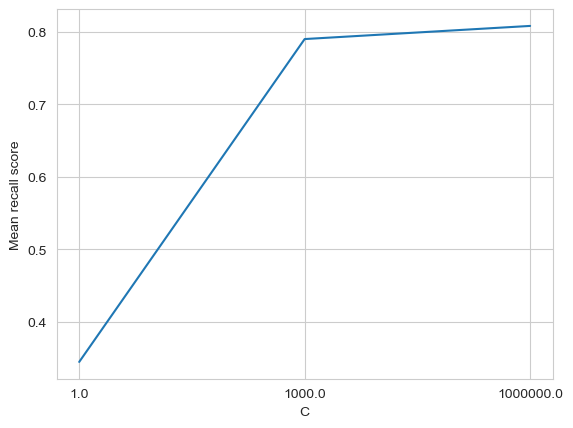

In [8]:
plt.figure()
plt.plot(C, clf.cv_results_['mean_test_score'])
plt.xlabel("C")
plt.ylabel("Mean recall score")
plt.xscale("log")
plt.xticks(C, C)
plt.show()

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9970    0.9991    0.9980      5344
           1     0.9275    0.8000    0.8591        80

    accuracy                         0.9961      5424
   macro avg     0.9623    0.8995    0.9285      5424
weighted avg     0.9960    0.9961    0.9960      5424



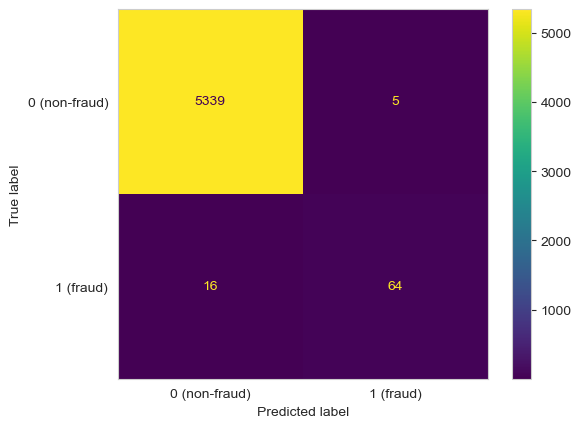

In [9]:
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-fraud)", "1 (fraud)"])
plt.grid(False)
plt.show()

## Find the optimal regularization parameter for a Logistic Regression classifier

In [10]:
C = np.logspace(-3, 3, 3)
parameters = {'C': C}

logistic_regression_classifier = LogisticRegression(max_iter=1000)
clf = GridSearchCV(logistic_regression_classifier, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e+00, 1.e+03])},
             scoring='recall')

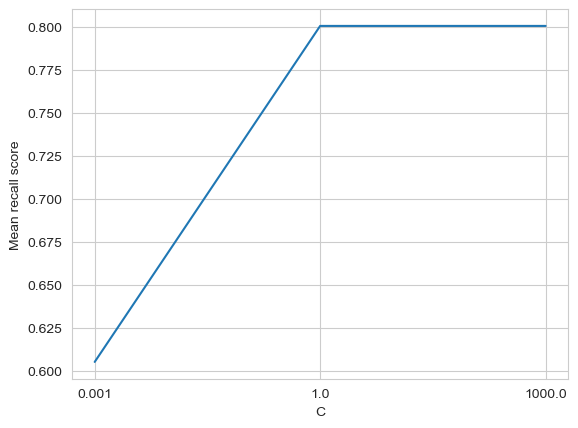

In [11]:
plt.figure()
plt.plot(C, clf.cv_results_['mean_test_score'])
plt.xlabel("C")
plt.ylabel("Mean recall score")
plt.xscale("log")
plt.xticks(C, C)
plt.show()

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9970    0.9996    0.9983      5344
           1     0.9697    0.8000    0.8767        80

    accuracy                         0.9967      5424
   macro avg     0.9834    0.8998    0.9375      5424
weighted avg     0.9966    0.9967    0.9965      5424



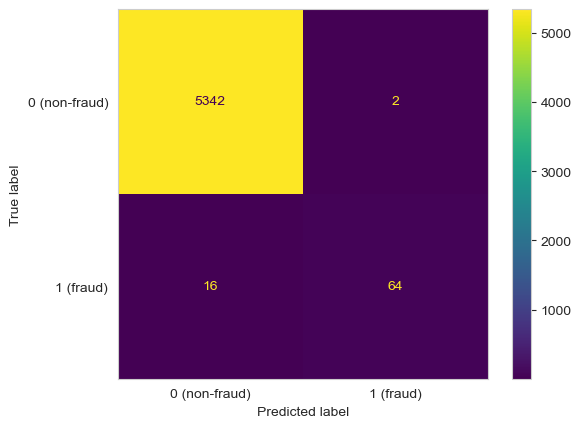

In [12]:
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-fraud)", "1 (fraud)"])
plt.grid(False)
plt.show()

Generally, the Precision-Recall Curve is used when there is a moderate to large class imbalance.

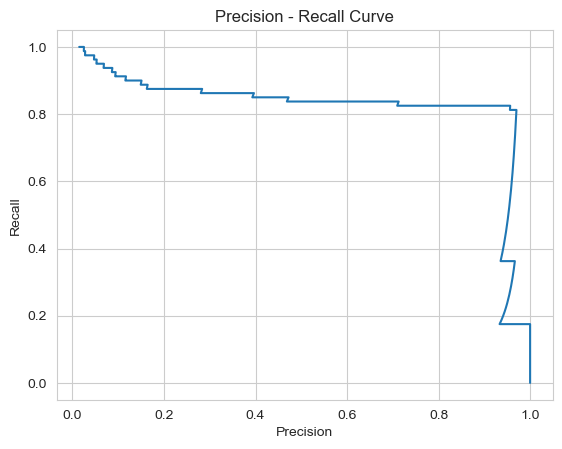

In [13]:
y_proba = clf.best_estimator_.predict_proba(X_test)[:, -1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(precision, recall)
plt.title('Precision - Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()